In [2]:
import pandas as pd

In [3]:
fruits = pd.read_csv('../Data/fruits.csv')
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


In [4]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  49 non-null     float64
 1   weight  49 non-null     float64
 2   name    49 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


---
### Training 과 Test Set 분리
- training에는 사과만 test에는 딸기 만으로 분리 : 이렇게 된 것을 Sampling 편향이 발생했다. 

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_input = fruits.loc[:34,['length','weight']]
train_target = fruits.loc[:34,'name']

In [7]:
len(train_input) == len(train_target)

True

In [8]:
test_input = fruits.loc[35:,['length','weight']]
test_target = fruits.loc[35:,'name']

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
kn = KNeighborsClassifier()

In [11]:
kn.fit(train_input,train_target)

KNeighborsClassifier()

In [12]:
kn.score(test_input,test_target)

0.0

In [13]:
import matplotlib.pyplot as plt

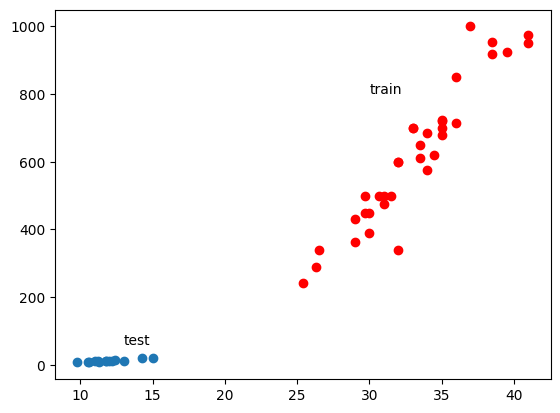

In [14]:
plt.scatter(
    x=train_input['length'],
    y=train_input['weight'],
    c='red'
)

plt.text(
    x=30,
    y=800,
    s='train'
)

plt.scatter(
    x=test_input['length'],
    y=test_input['weight']
)

plt.text(
    x=13,
    y=60,
    s='test'
)

plt.show()

### numpy random.shuffle 이용하여 sampling 하기

In [15]:
import numpy as np

In [16]:
np.random.seed(42) # 시드 맞출려고 하는거지 필요 x

In [17]:
index = np.arange(49)
np.random.shuffle(index)
index

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [18]:
# train 데이터
train_input=fruits.loc[list(index[:35]),['length','weight']]
train_target=fruits.loc[list(index[:35]),'name']

In [19]:
# test 데이터
test_input=fruits.loc[list(index[35:]),['length','weight']]
test_target=fruits.loc[list(index[35:]),'name']

In [20]:
kn.fit(train_input,train_target)

KNeighborsClassifier()

In [21]:
kn.score(test_input,test_target)

1.0

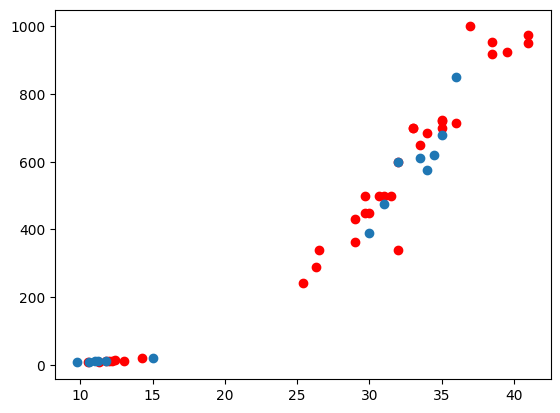

In [22]:
plt.scatter(
    x=train_input['length'],
    y=train_input['weight'],
    c='red'
)

plt.scatter(
    x=test_input['length'],
    y=test_input['weight']
)

plt.show()

---
### scikit-learn을 이용

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_input , test_input , train_target , test_target=\
train_test_split(fruits[['length','weight']],fruits.name,random_state=42)

In [25]:
# 2 : 1 로 나누어 준다. 
print(train_input.shape , test_input.shape)

(36, 2) (13, 2)


In [26]:
# 빈도수 세기
import collections

In [37]:
collections.Counter(test_target)

Counter({'apple': 9, 'berry': 4})

In [29]:
collections.Counter(train_target)

Counter({'apple': 25, 'berry': 11})

In [30]:
# apple과 berry의 비율
len(fruits[fruits.name == 'apple']) / len(fruits[fruits.name == 'berry'])

2.5

> apple과 berry의 비율을 비슷하게 해야 될 필요가 있다. 

In [31]:
# apple과 berry의 비율을 비슷하게 하기
train_input , test_input , train_target , test_target=\
train_test_split(fruits[['length','weight']],fruits.name,random_state=42,stratify=fruits.name)

In [32]:
kn.fit(train_input,train_target)

KNeighborsClassifier()

In [33]:
kn.score(test_input,test_target)

1.0

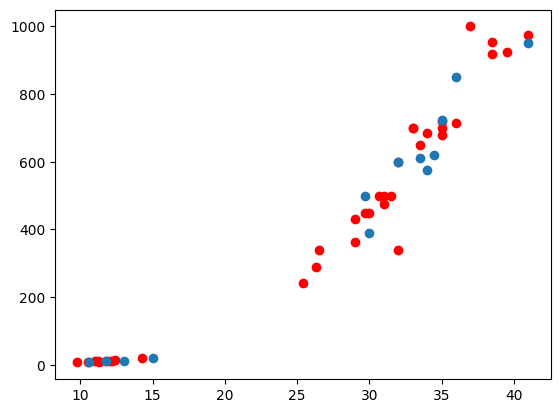

In [34]:
plt.scatter(
    x=train_input['length'],
    y=train_input['weight'],
    c='red'
)

plt.scatter(
    x=test_input['length'],
    y=test_input['weight']
)

plt.show()